# 1. seaborn + matplotlib

- seaborn을 matplotlib과 섞어쓰는 방법이다.
- 4부 중 첫 번째 시간이다.
- seaborn 함수 중 matplotlib를 반환하는 함수들에 관한 내용이다.

**seaborn API**

- seaborn은 matplotlib을 쉽고 아름답게 쓰고자 만들어졌다.
  - 따라서 seaborn의 결과물은 당연히 matplotlib의 결과물이다.
  - 그러나 간혹 sraborn이 그린 그림의 폰트, 색상에 접근이 되지 않아 난처하다.
  - seaborn의 구조를 잘 이해하지 못하면 해결도 어렵다.

- v0.11 기준으로 seaborn에는 다음 함수들이 있다.

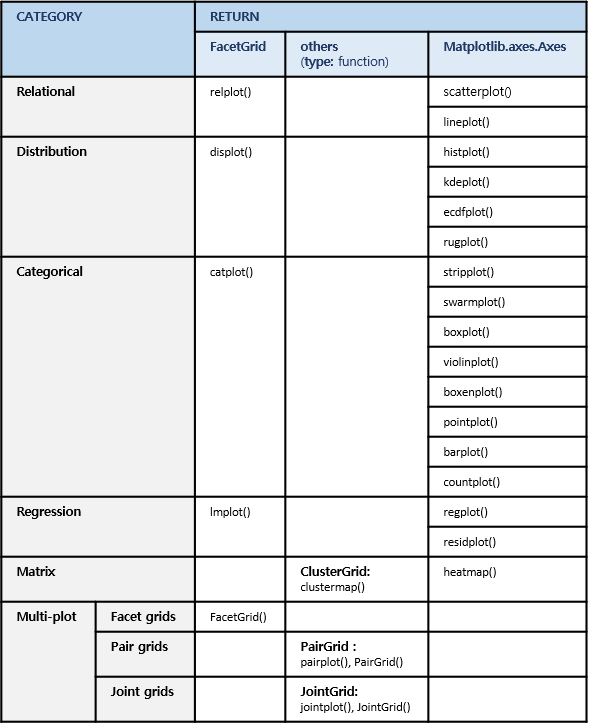

그림1

- matplotlib의 출력물은 ```figure```와 ```axes```만을 만환한다.
 - seaborn의 명령어 중 axes를 반환하는 것들은 matplotlib의 **객체 지향** ```object orienrted``` **intergace**를 사용해서 그림의 틀을 만든 뒤, 특정 ```axes```에 seaborn을 삽입하면 된다. ```*객체지향: 객체 단위로 변수(메소드)가 담겨있는 것```
 - 만들고 싶은걸 만들수 있다.

 ## 1.1. Load data

- 예제로 사용할 펭귄 데이터를 불러온다.
- seaborn에 내장되어 있다. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins") # 데이터를 불러옴
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 1.2. ```figuer``` and ```axes```

- matplotlib으로 도화지 ```figure```를 깔고 축공간 ```axes```를 만든다.
- axes는 다시 두 개의 axis를 만든다.
- 1×2 축공간을 구성한다.

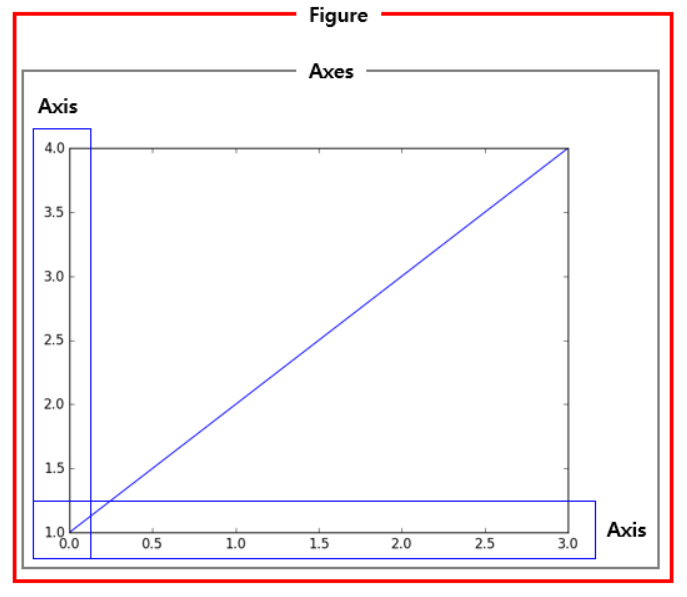

그림2 https://wikidocs.net/4763

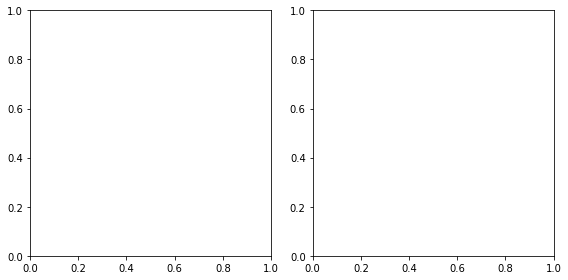

In [7]:
fig, axes= plt.subplots(ncols=2, figsize=(8,4)) # plt.subplots 다수의 그래프를 표현, ncols 몇 행을 만들지, nrows 몇 열을 만들지, 참조 http://asq.kr/ZiaxnD5nC1Oej

fig.tight_layout() # tight_layout 명시된 여백에 관한 서브플롯 파라미터를 조정, 셋팅 값을 지정하지 않으면 기존에 세팅된 기본값을 이용하여 자동으로 레이아웃 설정

## 1.3. plot with matplotlib

- matplotlib 기능을 이용해서 산점도를 그린다.
 - x축은 부리 길이 ```bill length```
 - y축은 부리 위 아래 두께 ```bill depth```
 - 색상은 종 ```species```로 한다.<br>
   Adelie, Chinstrap, Gentoo이 있다.

- 두 축공간 중 왼쪽에만 그린다.

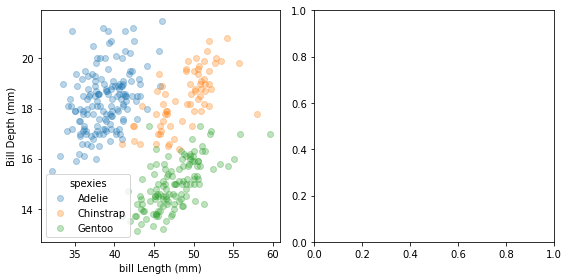

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

species_u = penguins["species"].unique() # unique는 중복 값을 제거 참조: https://lightblog.tistory.com/18

# plot 0 : matplotlib
for i, s in enumerate(species_u): # for in 반복문을 지원하고 enumerate은 반복문의 순서를 확인하는데 사용 참조: https://wikidocs.net/16045
  axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s], # x축 값
                  penguins["bill_depth_mm"].loc[penguins["species"]==s], # y 축 값
                  c=f"C{i}", label=s, alpha=0.3 # alpha는 투명도 두 개는 모르겠음
                  ) # scatter(x, y)는 벡터 x와 y로 지정된 위치에 원을 사용하여 산점도 플롯을 만든다. 참조: http://asq.kr/BnfkuuzXK8HFx
  axes[0].legend(species_u, title="spexies")
  axes[0].set_xlabel("bill Length (mm)")
  axes[0].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

## 1.4. plot with seaborn

**seaborn scatterplot**

- 이번엔 같은 plot을 seaborn으로 그려본다.
- 위 코드에 아래 세 줄만 추가한다.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


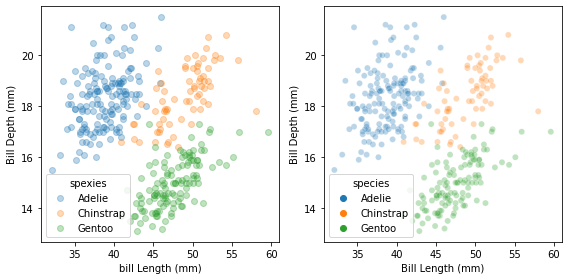

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib
for i, s in enumerate(species_u):
  axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s],
                  penguins["bill_depth_mm"].loc[penguins["species"]==s],
                  c=f"C{i}", label=s, alpha=0.3
                  )
  axes[0].legend(species_u, title="spexies")
  axes[0].set_xlabel("bill Length (mm)")
  axes[0].set_ylabel("Bill Depth (mm)")

# plot 1 : seaborn
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.3, ax=axes[1]) # matplotlib의 scatter와 비슷, x축,y축 형식으로 적용되고 외의 변수를 hue로 가져옴
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

- 단 세 줄로 거의 동일한 그림이 나왔다.
 - scatter plot의 점 크기만 살짝 작다.
 - label의 투명도만 살짝 다르다.

- seaborn 명령 ```scatterplot()```을 그대로 사용했다.
- x축과 y축 label도 바꾸었다.
 - ```as=axes[1]```인자에서 볼 수 있듯, 존재하는 ```axes```에 그림만 얹었다.
 - **matplotlib 틀 + seaborn 그림** 이므로, matplotlib 명령이 모두 통한다.

## 1.5. matplotlib + seaborn & seaborn + matplotlib

- matplotlib과 seaborn이 자유롭게 섞일 수 있다.
 - **matplotlib 산점도 위에 seaborn 추세선**을 얹을 수 있다.
 - **seaborn 산점도 위에 matplotlib 중심선**을 얹을 수 있다.

- 파이썬 코드는 다음과 같다.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

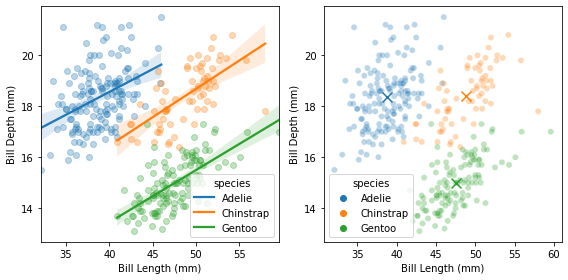

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib + seaborn
for i, s in enumerate(species_u):
    # matplotlib 산점도
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s],
                   penguins["bill_depth_mm"].loc[penguins["species"]==s],
                   c=f"C{i}", label=s, alpha=0.3
                  )
				  
    # seaborn 추세선
    sns.regplot("bill_length_mm", "bill_depth_mm", data=penguins.loc[penguins["species"]==s], 
                scatter=False, ax=axes[0]) # scatter=False 그래프의 투명도를 사용
    
axes[0].legend(species_u, title="species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

# plot 1 : seaborn + matplotlib
# seaborn 산점도
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.3, ax=axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

for i, s in enumerate(species_u): # seaborn형에 추가를 해도 위의 값과 동일한 식으로 들어간다. ex) for in.
    # matplotlib 중심점
    axes[1].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s].mean(), # mean 값의 평균을 지정
                   penguins["bill_depth_mm"].loc[penguins["species"]==s].mean(),
                   c=f"C{i}", alpha=1, marker="x", s=100 # marker="x"은 산점도와의 구별을 위해 사용, s=100 중심선의 크기를 설정
                  )

fig.tight_layout()

## 1.6. seaborn + seaborn + matplotlib

- 안 될 이유가 없다.
- seaborn ```scatterplot``` + seaborn ```kdeplot``` + matplotlib ```text``` 이다.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


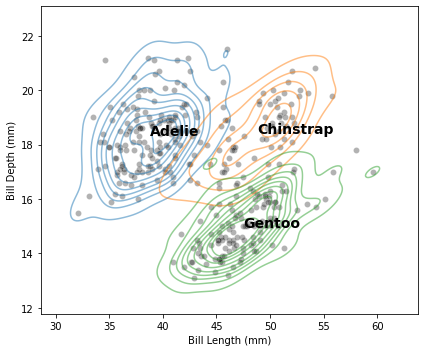

In [54]:
fig, ax = plt.subplots(figsize=(6,5)) # fig 임의값

# plot 0: scatter plot
sns.scatterplot("bill_length_mm", "bill_depth_mm", color="k", data=penguins, alpha=0.3, ax=ax, legend=False) # color="k" 점의 색깔

# plot 1: kde plot
sns.kdeplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.5, ax=ax, legend=False) # 지형도

# text:
species_u = penguins["species"].unique()
for i, s in enumerate(species_u):
    ax.text(penguins["bill_length_mm"].loc[penguins["species"]==s].mean(),
            penguins["bill_depth_mm"].loc[penguins["species"]==s].mean(),
            s = s, fontdict={"fontsize":14, "fontweight":"bold","color":"k"}
            )

ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")

fig.tight_layout()

## 1.7. 결론

- seaborn을 matplotlib과 마음껏 섞어쓰자.
- 단, **```axes```를 반환하는 명령어에 한해서** 말이다.
- 이런 명령어를 ```axes-level function```이라고 한다.

출처: https://jehyunlee.github.io/ 자료를 이용해 학습 했다.